In [6]:
# Import the FEMSystem Class from directory above
import sys
sys.path.append('..')
from FEMSystem import FEMSystem

import jax.numpy as jnp
import pickle
import matplotlib.pyplot as plt
import numpy as np

import os
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

In [13]:
separations = np.arange(1,11,0.5)

ratios = []
e_js,e_cs = [],[]
integrated_volumes = []
coeffs_array = []
n = 0

for sep in separations:
    with open(f"./allplots/sweep1/Separation {sep}/results.pkl", 'rb') as f:
        pickled_obj= pickle.load(f)
        print("Pickled object loaded",sep)
        E_J,E_C,e_0 = pickled_obj["E_J"],pickled_obj["E_C"],pickled_obj["e0"]
        ratios.append(E_J/E_C)
        e_js.append(E_J)
        e_cs.append(E_C)
        integrated_volumes.append(pickled_obj["integrated_volume"])
        coeffs_array.append(pickled_obj["coeffs"])
        n = pickled_obj["n"]

Pickled object loaded 1.0
Pickled object loaded 1.5
Pickled object loaded 2.0
Pickled object loaded 2.5
Pickled object loaded 3.0
Pickled object loaded 3.5
Pickled object loaded 4.0
Pickled object loaded 4.5
Pickled object loaded 5.0
Pickled object loaded 5.5
Pickled object loaded 6.0
Pickled object loaded 6.5
Pickled object loaded 7.0
Pickled object loaded 7.5
Pickled object loaded 8.0
Pickled object loaded 8.5
Pickled object loaded 9.0
Pickled object loaded 9.5
Pickled object loaded 10.0
Pickled object loaded 10.5


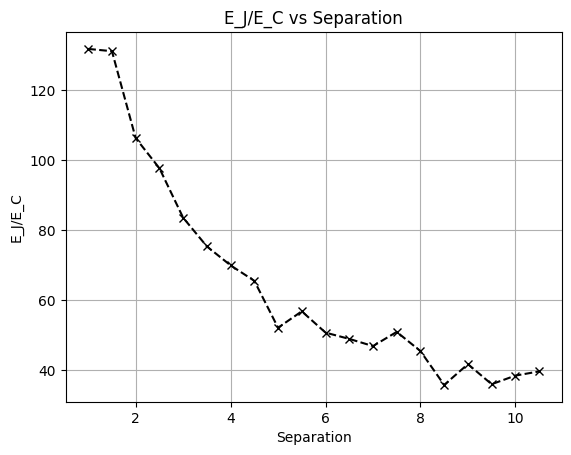

In [14]:
plt.plot(separations,ratios,"x--",color="black")
plt.xlabel("Separation")
plt.ylabel("E_J/E_C")
plt.title("E_J/E_C vs Separation")
plt.grid(True)

In [15]:
print(e_js)
print(e_cs)

[Array(0.20309448, dtype=float32), Array(0.20046616, dtype=float32), Array(0.16688156, dtype=float32), Array(0.15429306, dtype=float32), Array(0.13246536, dtype=float32), Array(0.12210846, dtype=float32), Array(0.1149292, dtype=float32), Array(0.10881805, dtype=float32), Array(0.08768845, dtype=float32), Array(0.09562683, dtype=float32), Array(0.08723068, dtype=float32), Array(0.08470154, dtype=float32), Array(0.08142853, dtype=float32), Array(0.08819199, dtype=float32), Array(0.08089828, dtype=float32), Array(0.06384277, dtype=float32), Array(0.07585144, dtype=float32), Array(0.06487656, dtype=float32), Array(0.07102966, dtype=float32), Array(0.07252884, dtype=float32)]
[Array(0.00154019, dtype=float32), Array(0.00152773, dtype=float32), Array(0.00156927, dtype=float32), Array(0.00157881, dtype=float32), Array(0.00158518, dtype=float32), Array(0.00162073, dtype=float32), Array(0.00164377, dtype=float32), Array(0.00166157, dtype=float32), Array(0.00168401, dtype=float32), Array(0.00168

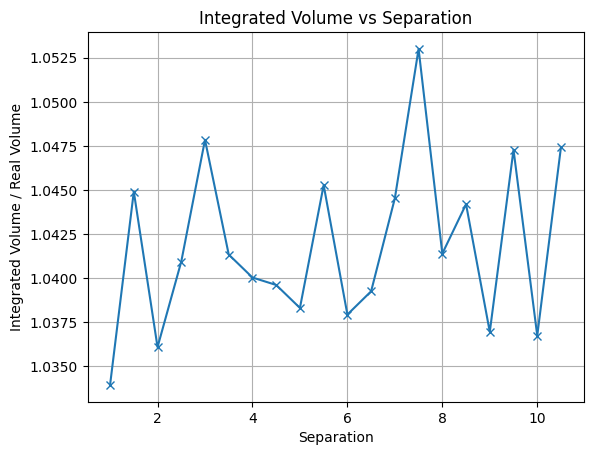

In [16]:
real_volume = 25**3 * 2

volume_ratios = np.array(integrated_volumes) / real_volume

plt.plot(separations,volume_ratios,"x-")
plt.xlabel("Separation")
plt.ylabel("Integrated Volume / Real Volume")
plt.title("Integrated Volume vs Separation")
plt.grid(True)

/tmp/ipykernel_811992/3841018612.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


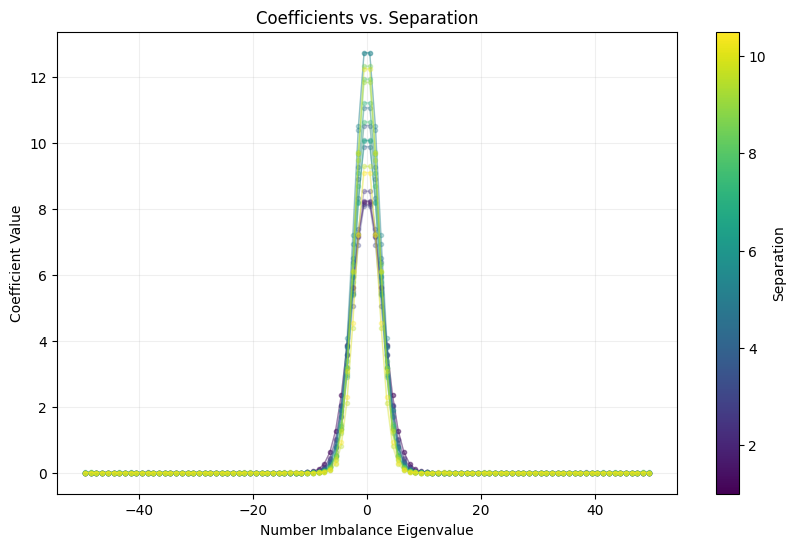

: 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Assuming:
# coeffs_array: 2D array/list of vectors
# separations: 1D array of values used for the colormap
# n: the number of coefficients (to define the x-axis)

# 1. Define the x-axis (Number Imbalance Eigenvalues)
x_axis = (n - 1) / 2 - np.arange(n)

# 2. Setup Figure and Colormap
fig, ax = plt.subplots(figsize=(10, 6))
cmap = cm.get_cmap('viridis')
norm = plt.Normalize(vmin=np.min(separations), vmax=np.max(separations))

# 3. Plot each vector in the array
for i, sep in enumerate(separations):
    line_color = cmap(norm(sep))
    
    ax.plot(x_axis, coeffs_array[i], 
            color=line_color, 
            marker="o", 
            linestyle="-", 
            alpha=0.3,      # Transparency to see overlaps
            linewidth=1, 
            markersize=3)

# 4. Add Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Separation')

# 5. Labels
ax.set_title('Coefficients vs. Separation')
ax.set_xlabel('Number Imbalance Eigenvalue')
ax.set_ylabel('Coefficient Value')
ax.grid(True, alpha=0.2)

plt.show()

In [2]:
pickled_obj = {}

with open('./allplots/test2/results.pkl', 'rb') as f:
    pickled_obj= pickle.load(f)

femsystem:FEMSystem = pickled_obj["femsystem"]
femsystem.saveFigsDir = None # Turn OFF saving plots
u_even,u_odd = pickled_obj["u_even"],pickled_obj["u_odd"]
u_even_interior,u_odd_interior = u_even[femsystem.interior_dofs],u_odd[femsystem.interior_dofs]
theta_at_dofs = pickled_obj["theta_at_dofs"]
theta_at_interior = theta_at_dofs[femsystem.interior_dofs]
n,coeffs = pickled_obj["n"],pickled_obj["coeffs"]
E_J,E_C,e_0 = pickled_obj["E_J"],pickled_obj["E_C"],pickled_obj["e0"]

print(f"EJ: {E_J}, EC: {E_C}, EJ/EC: {E_J/E_C}")

EJ: 1.6131095886230469, EC: 0.0014839264331385493, EJ/EC: 1087.0550537109375


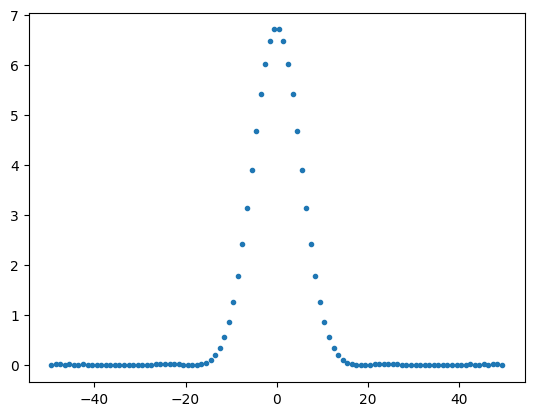

In [3]:
x = (n-1)/2 - jnp.arange(n)
plt.plot(x,coeffs,".")
# femsystem.plot_at_inteRior_2d(theta_at_dofs[femsystem.interior_dofs])
# femsystem.plot_at_interior_2d_in3d(u_odd_interior,plot_title="Odd Mode")
# femsystem.plot_at_interior_2d_in3d(u_even_interior,plot_title="Even Mode")

V min to max: -0.012100624 0.012100624


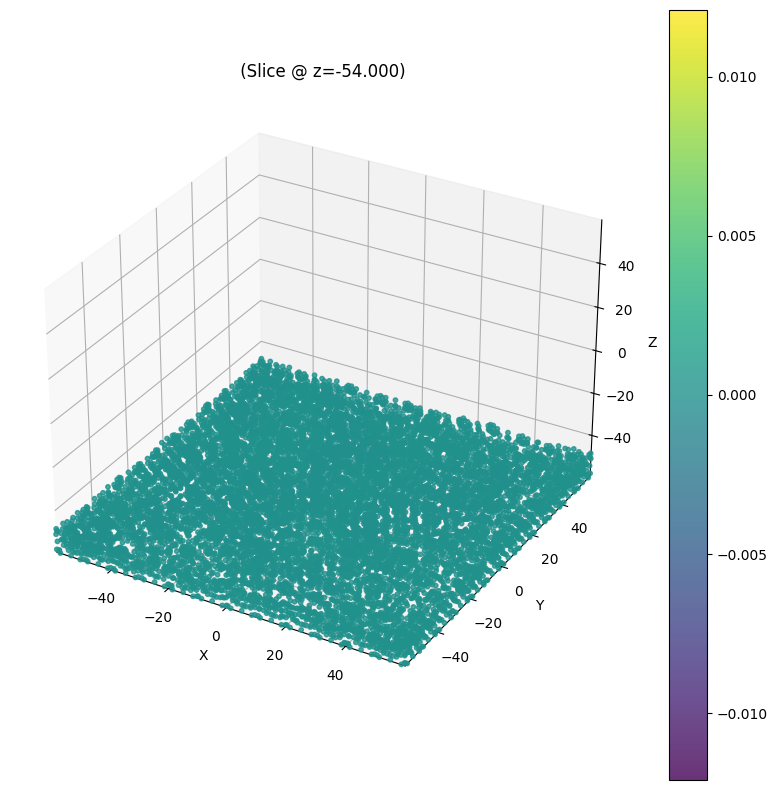

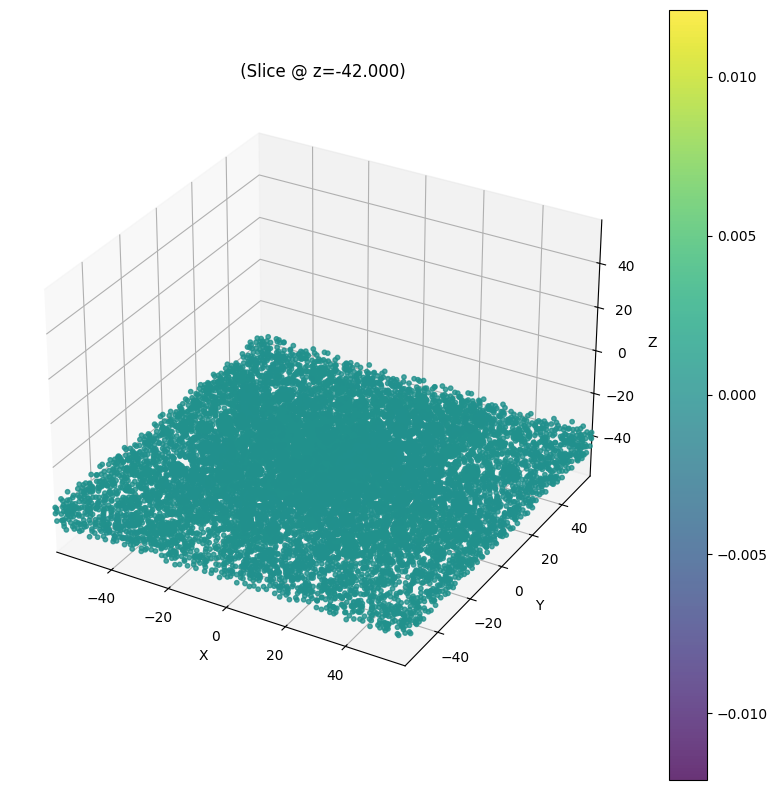

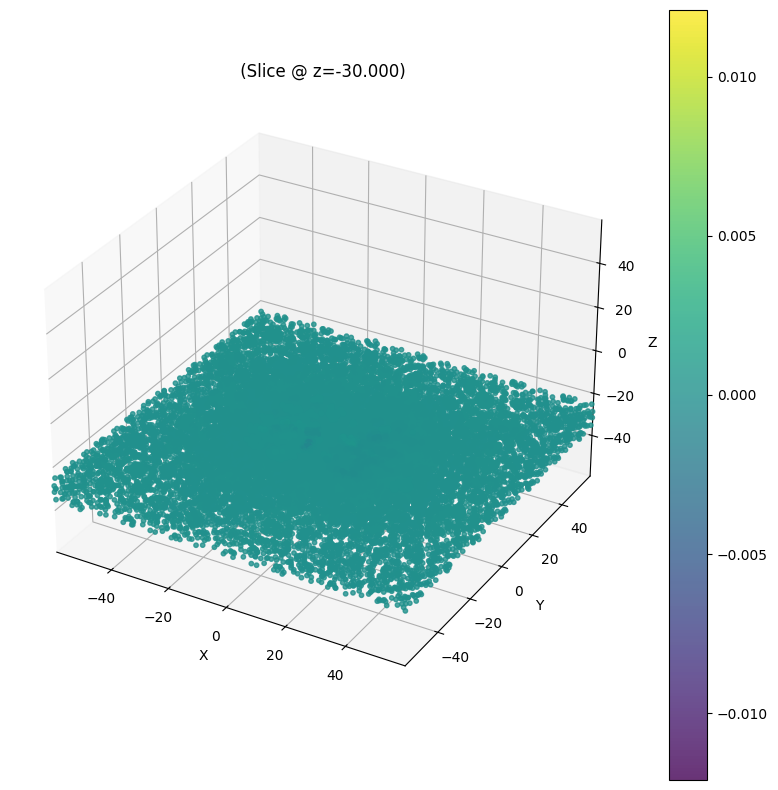

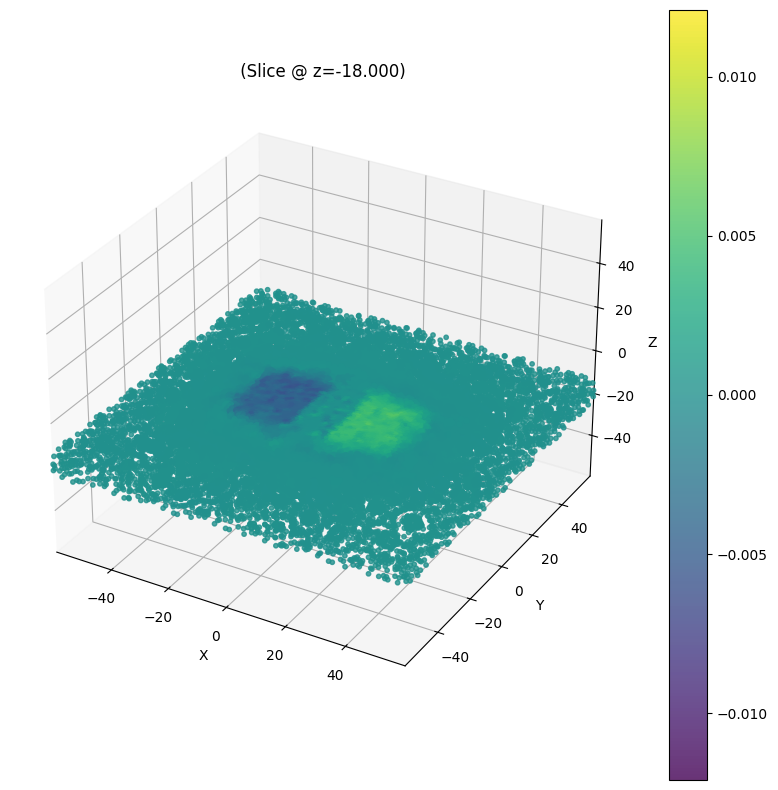

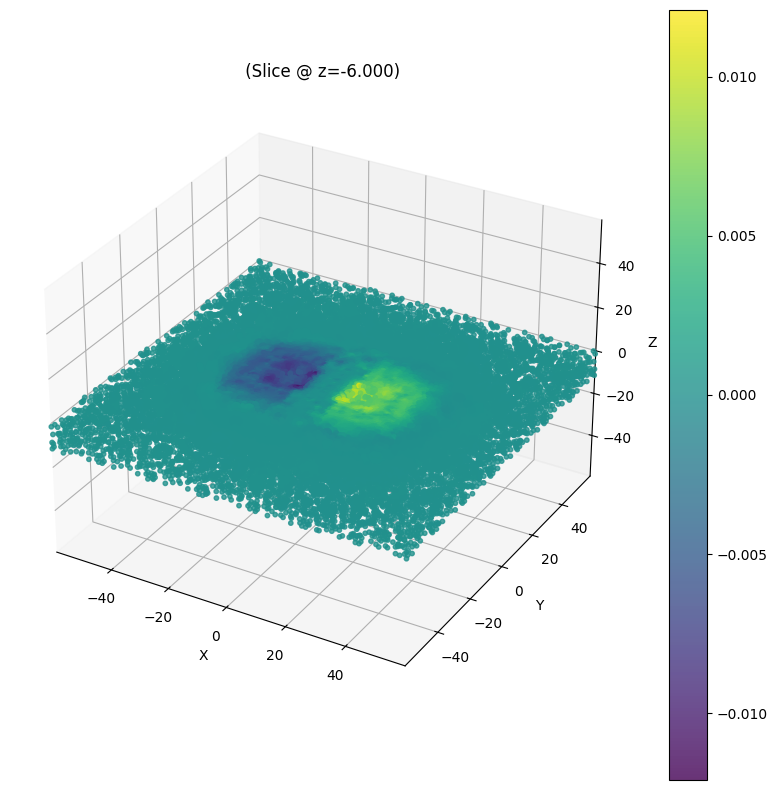

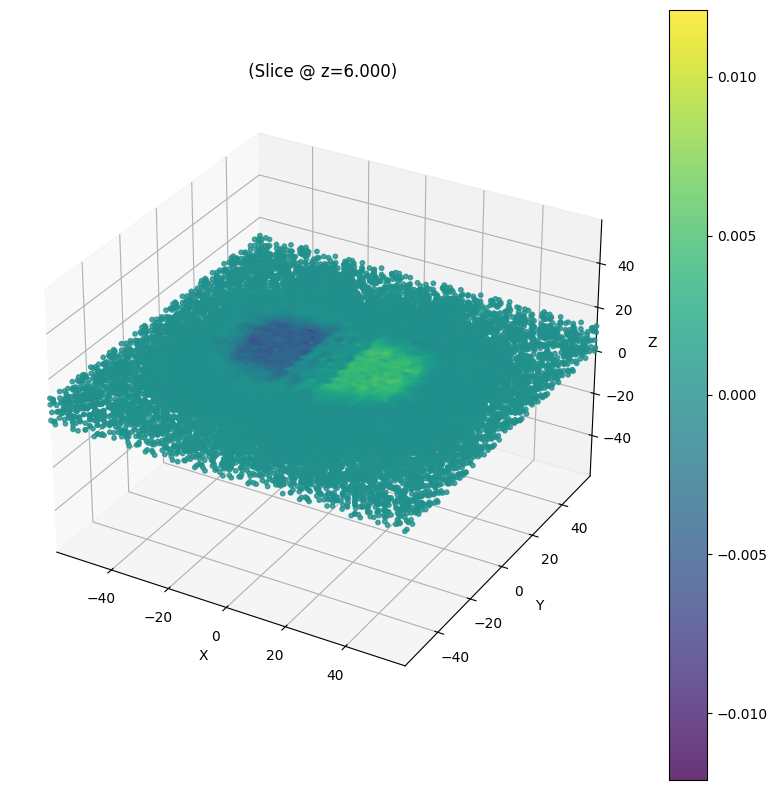

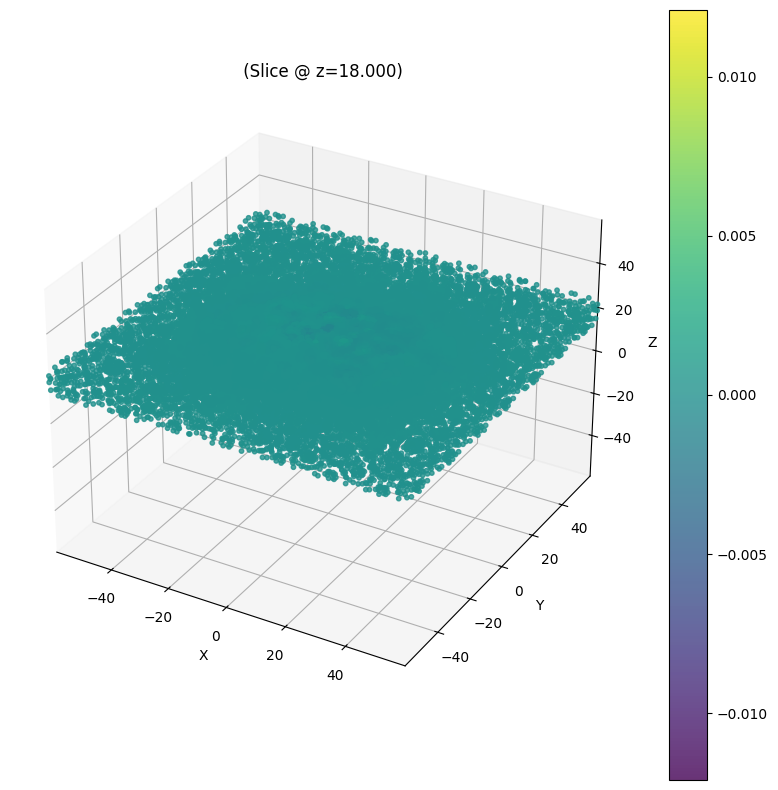

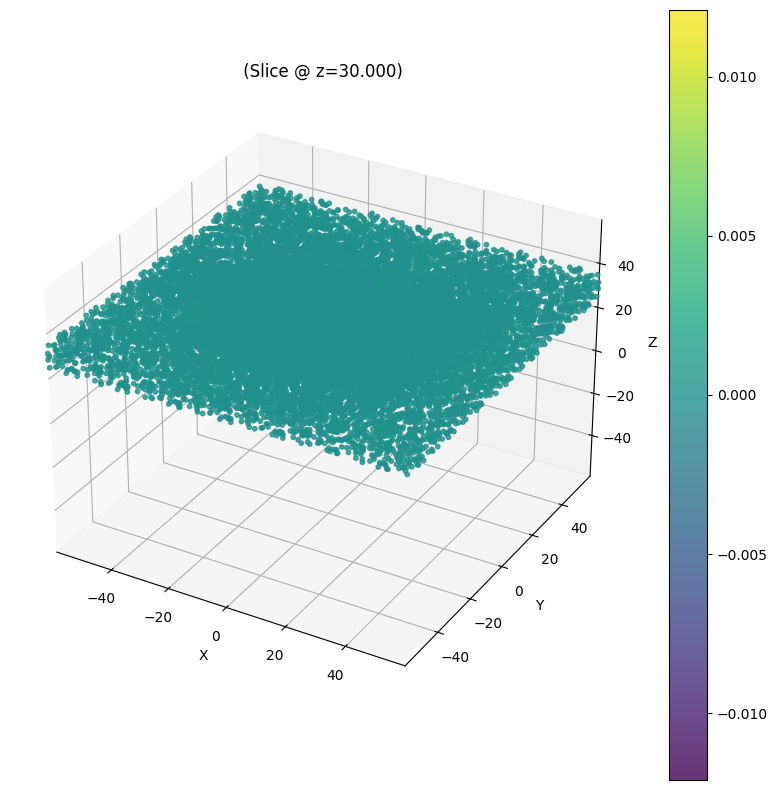

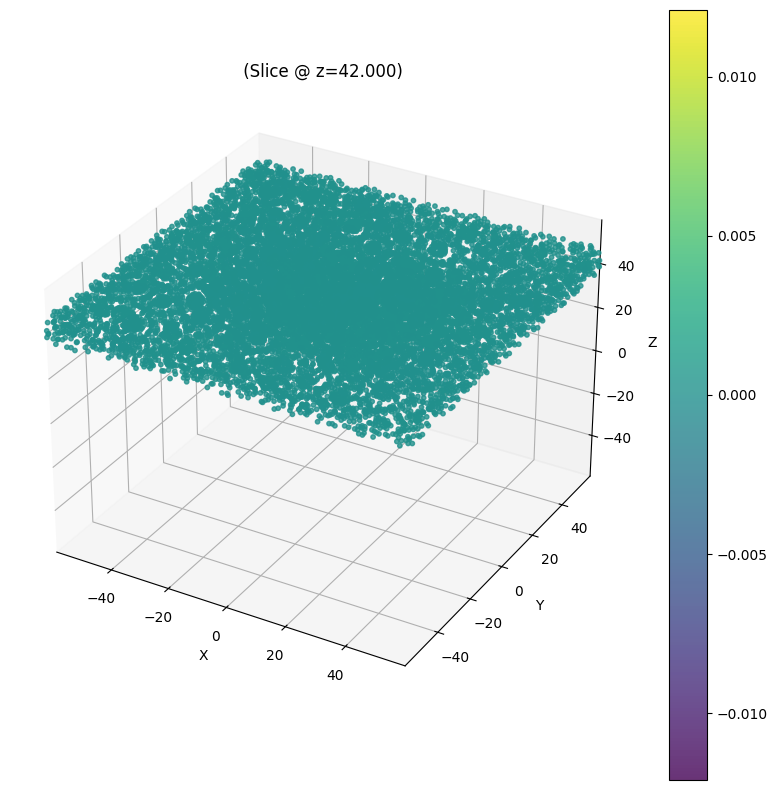

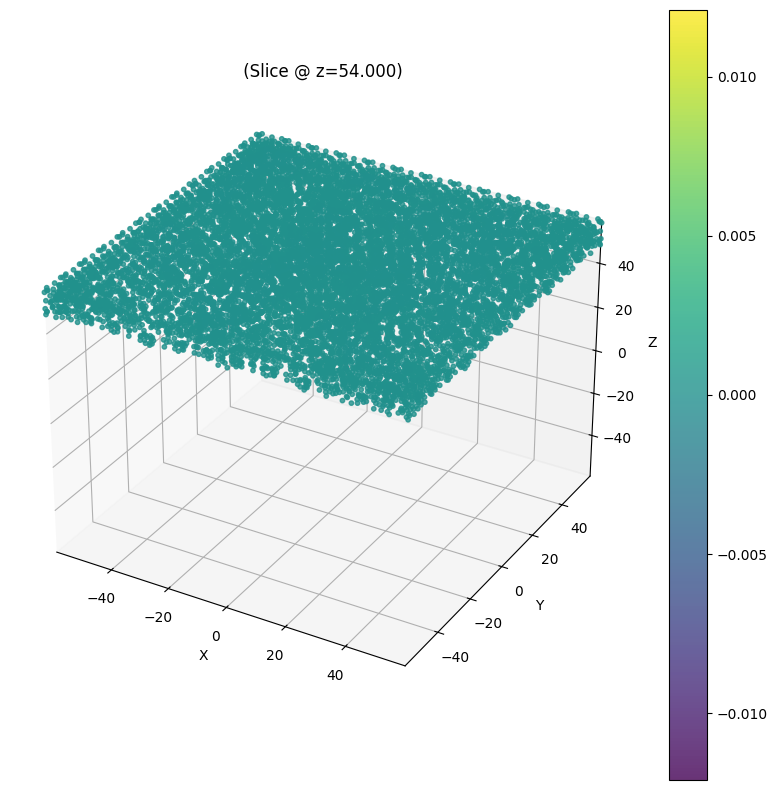

In [4]:
femsystem.plot_n_slices_interior(u_odd_interior,n_slices=10)

V min to max: -0.00013757413 0.0062988256


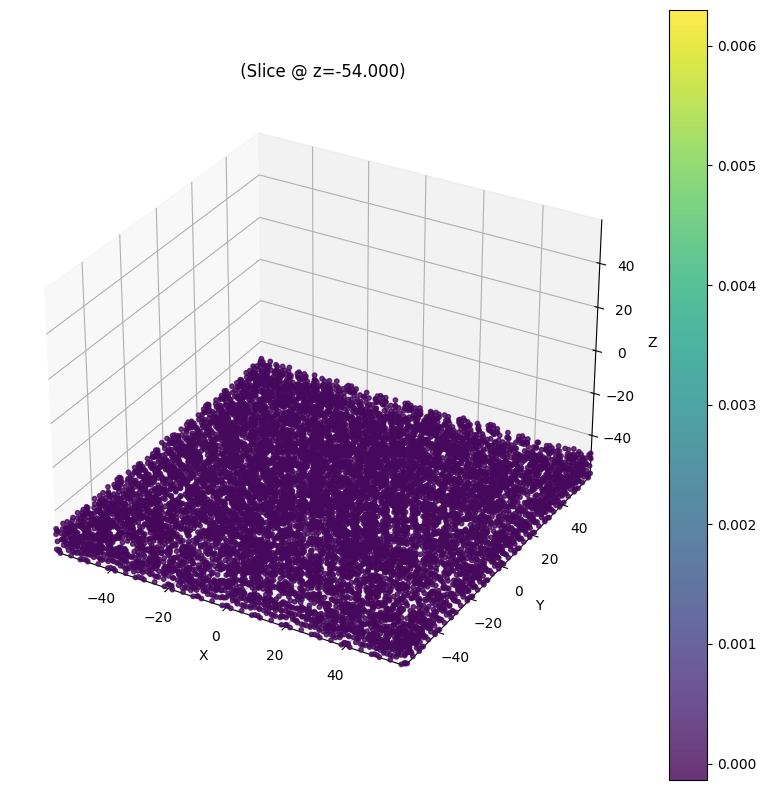

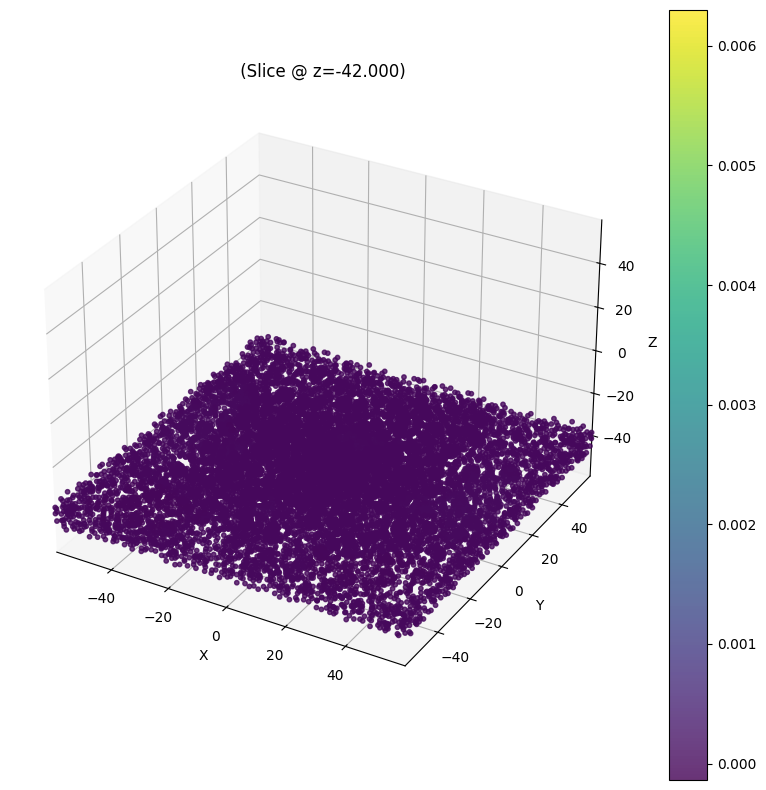

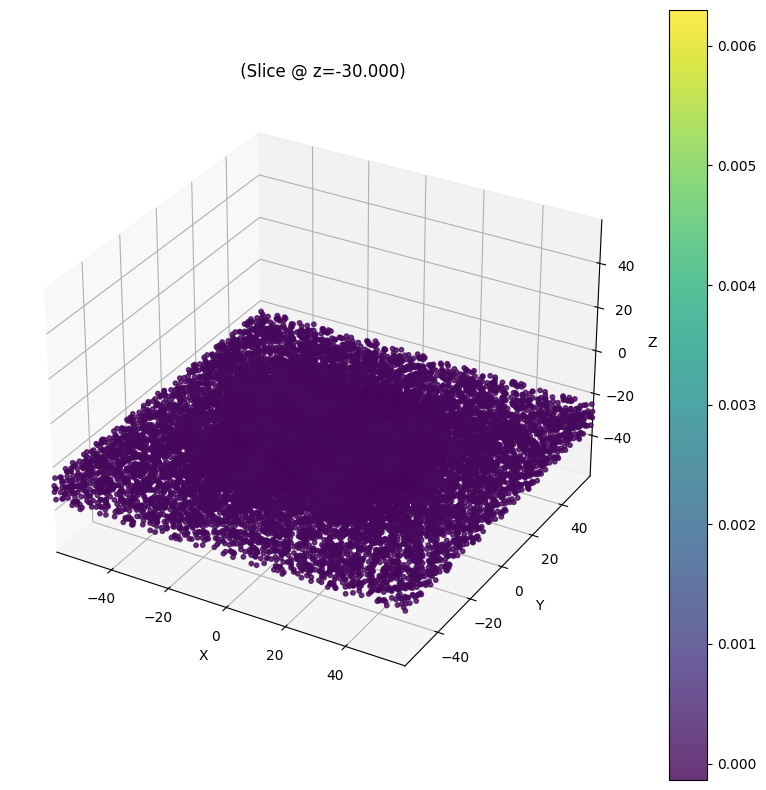

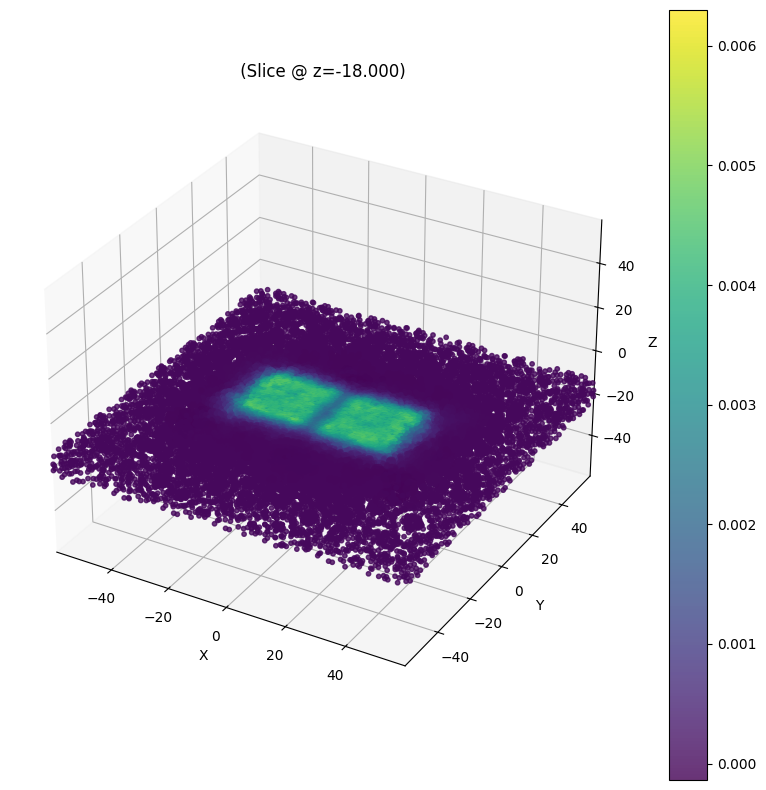

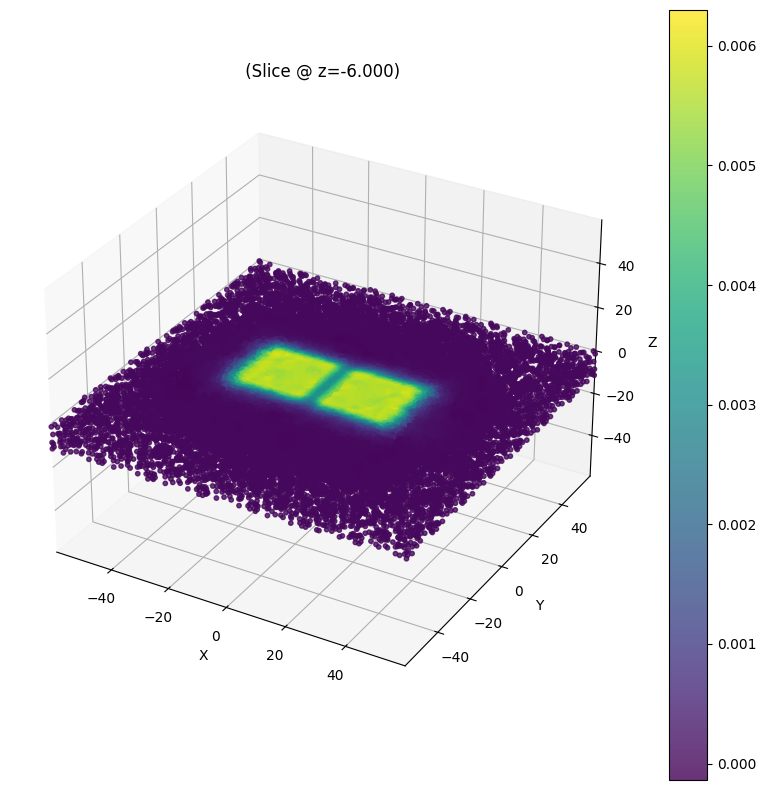

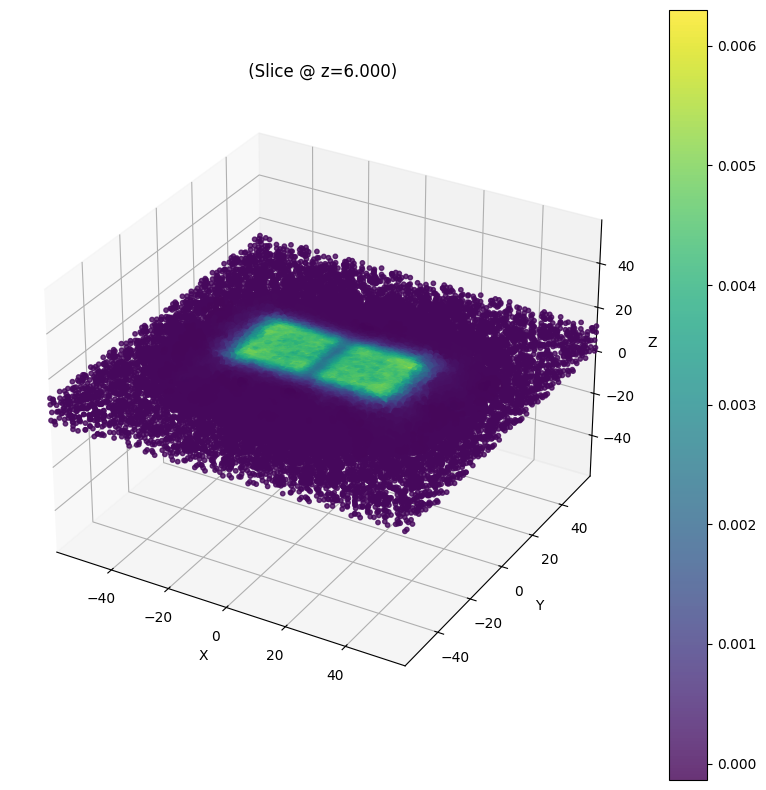

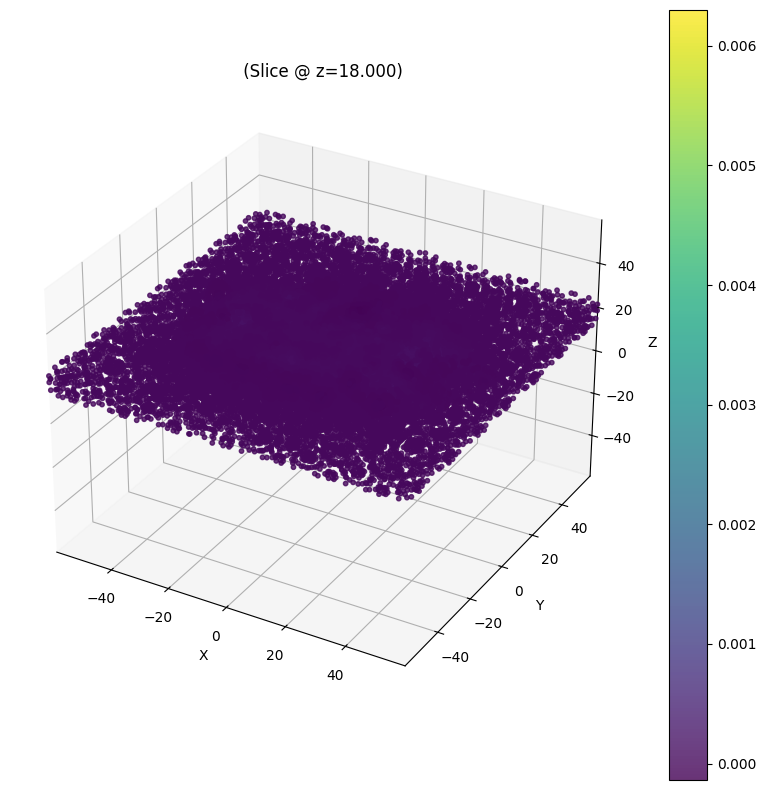

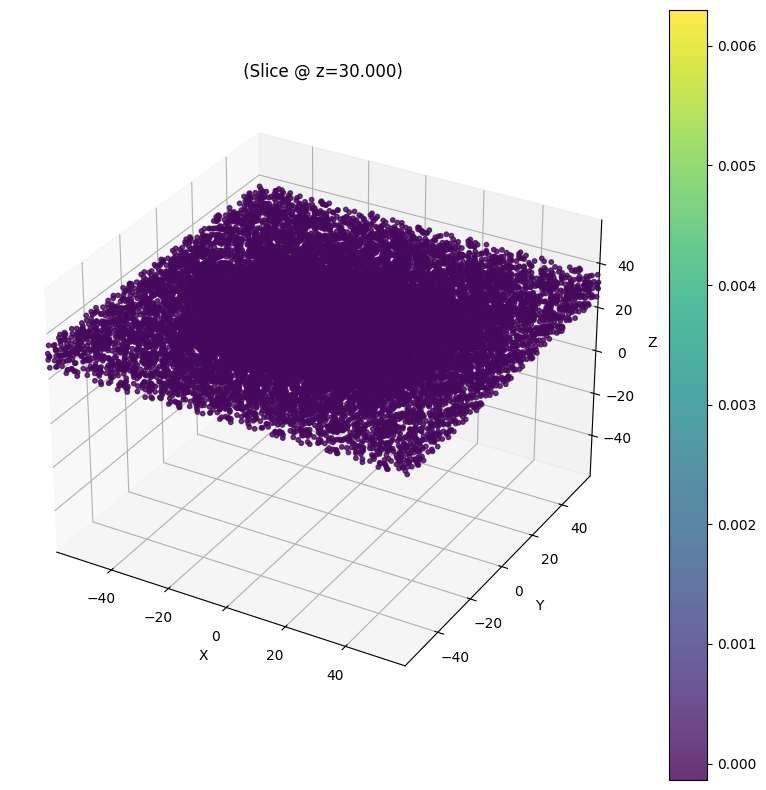

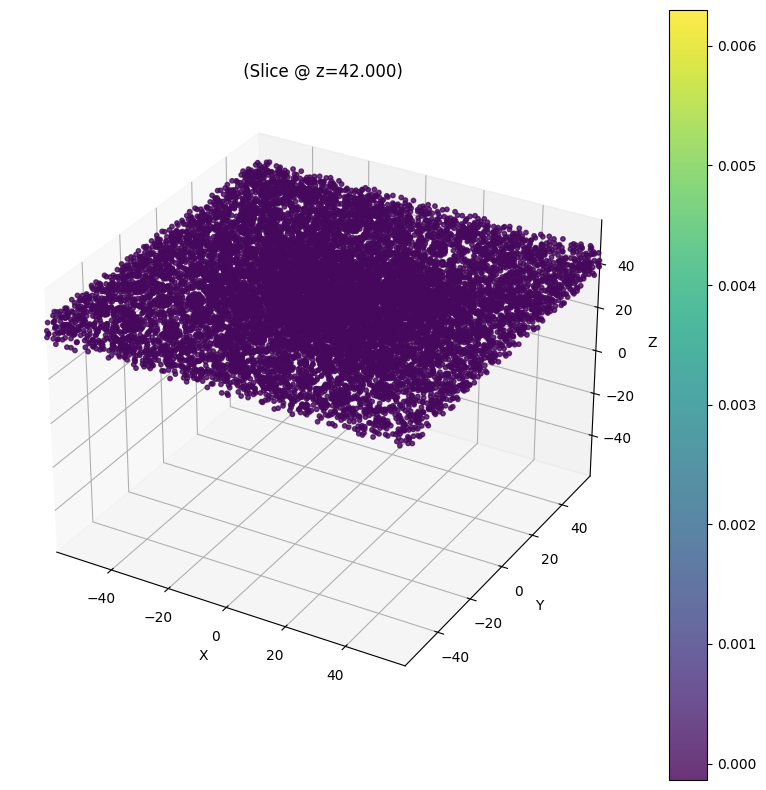

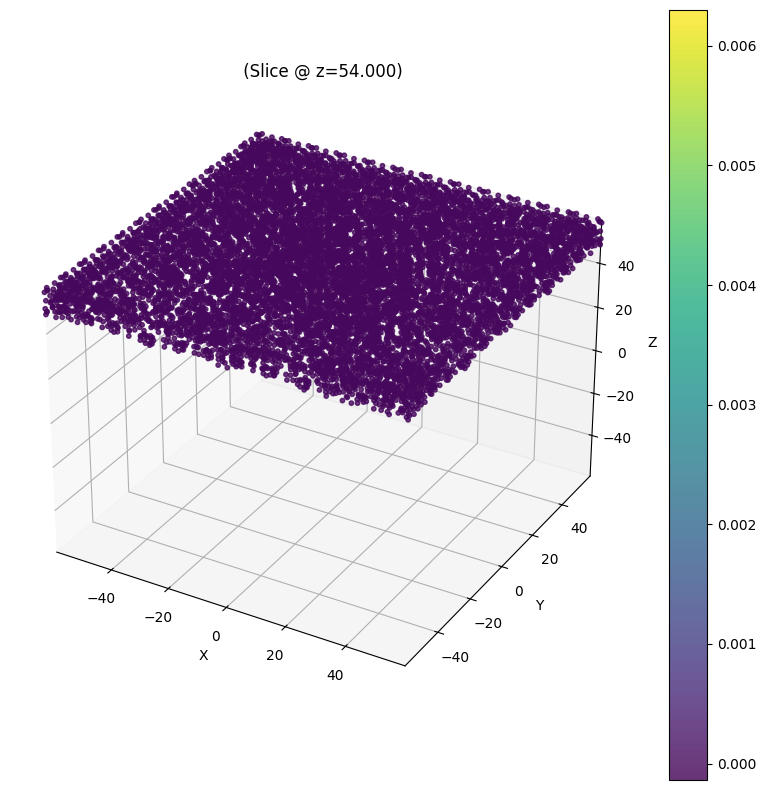

In [5]:
femsystem.plot_n_slices_interior(u_even_interior,n_slices=10)

# Plot the Geometry

V min to max: 0.0 1.0


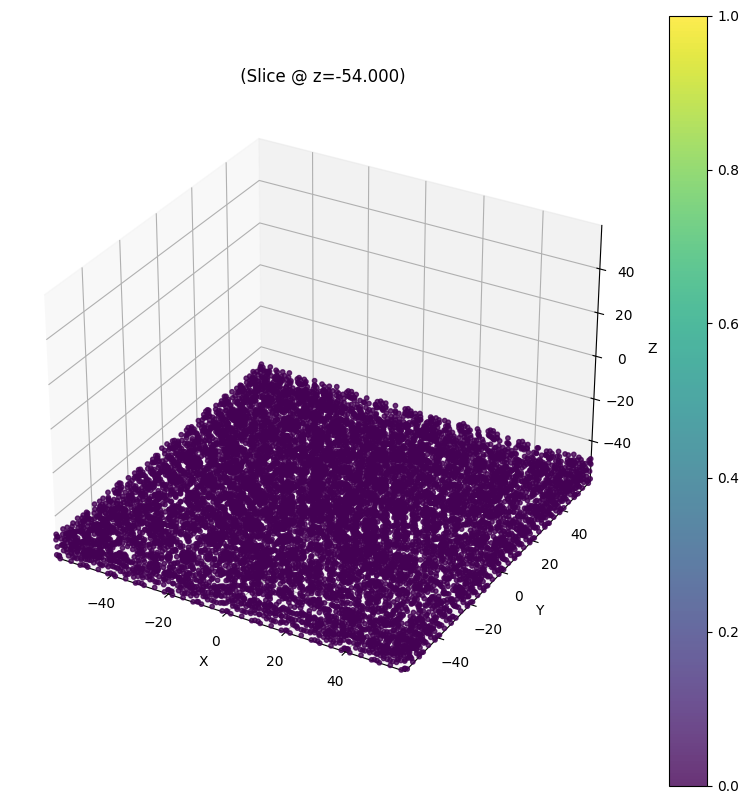

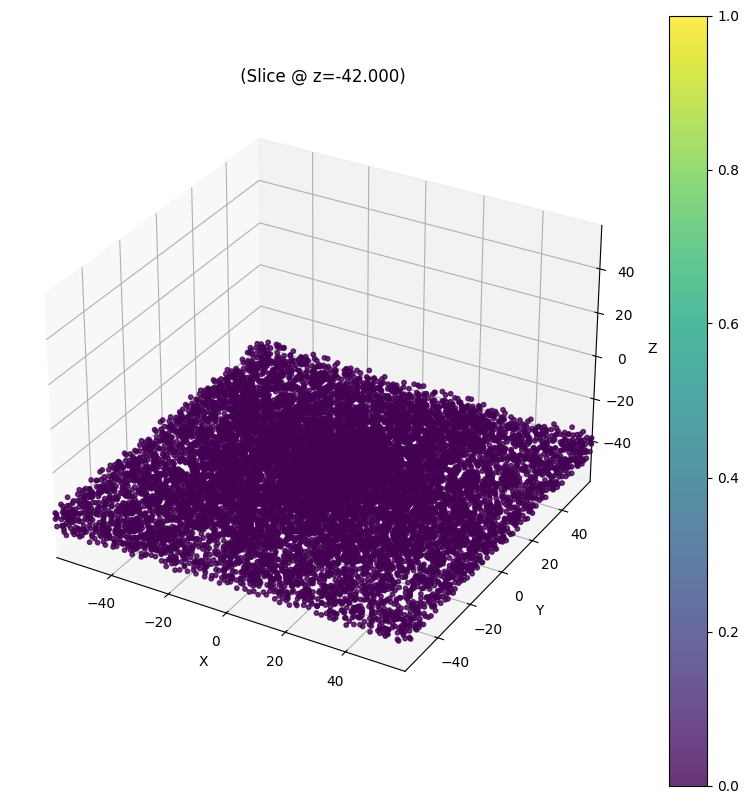

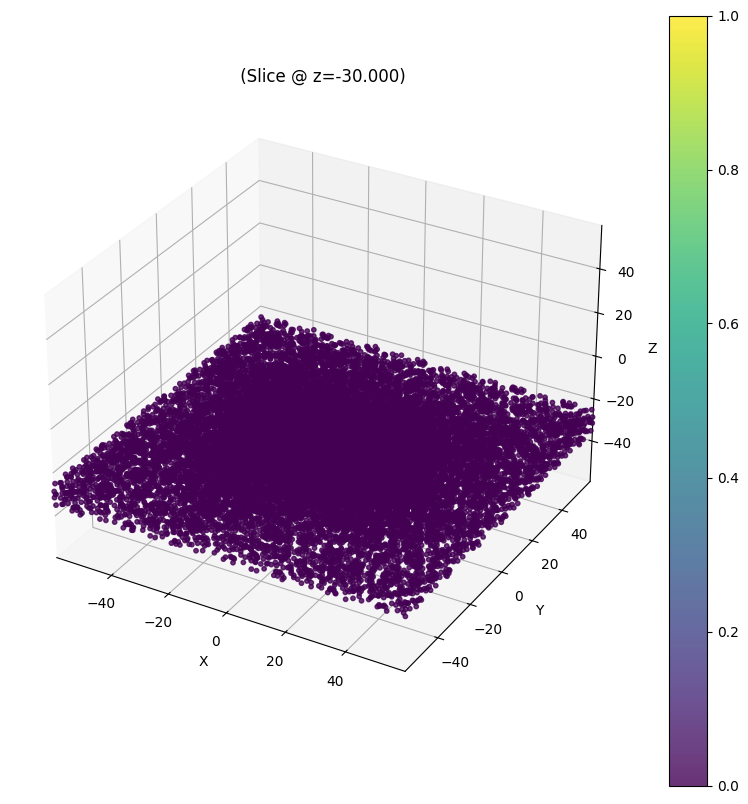

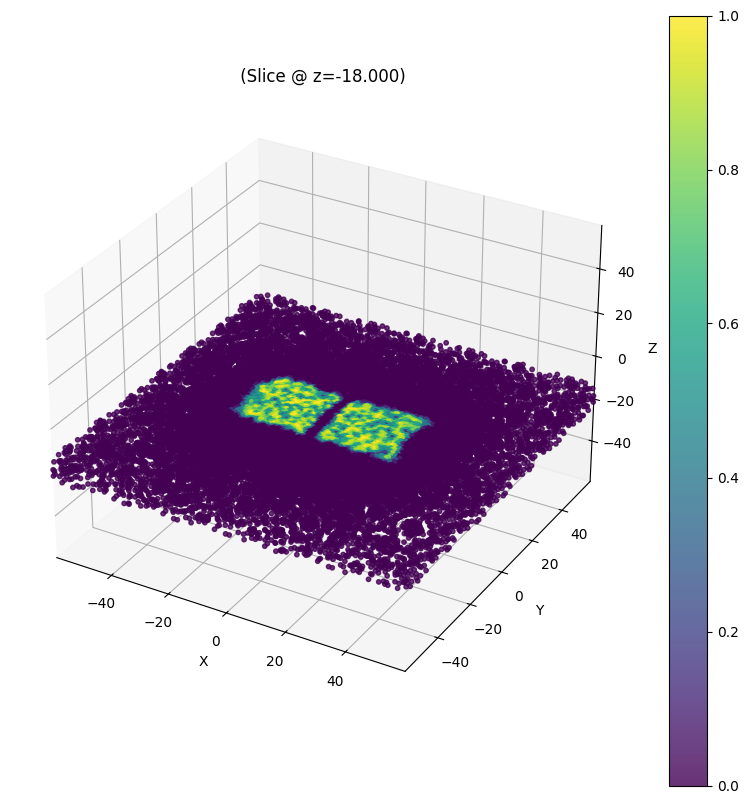

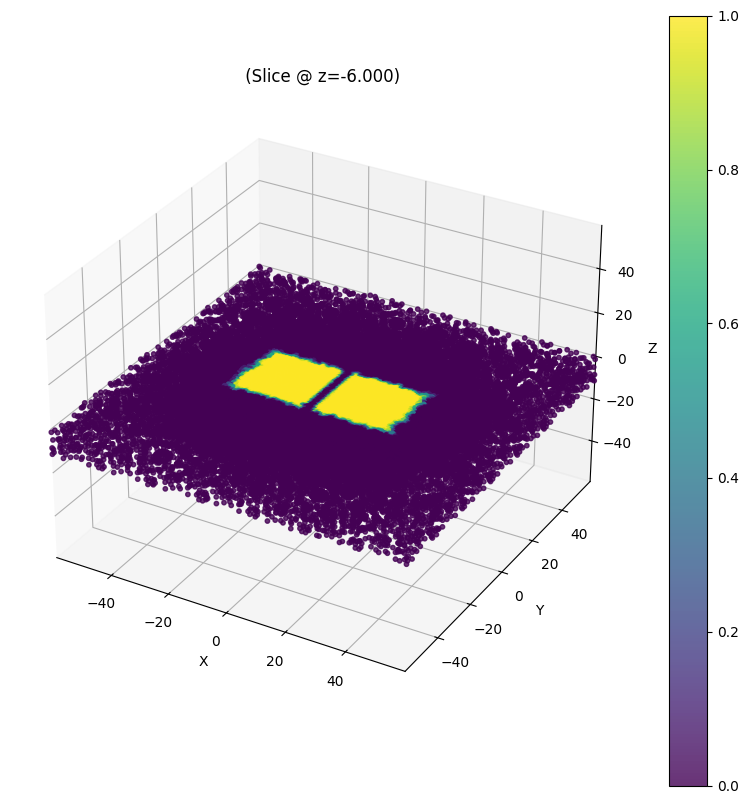

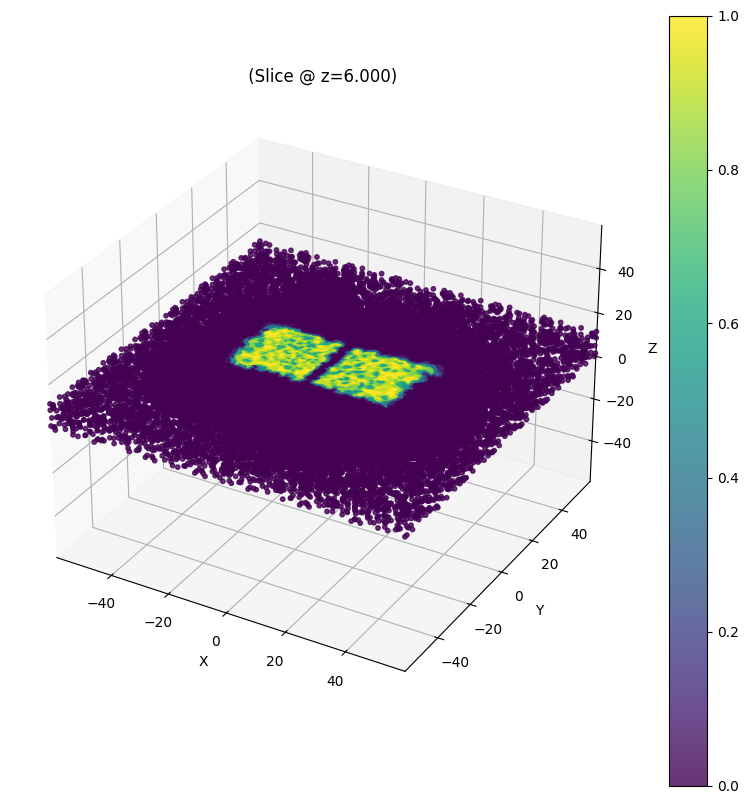

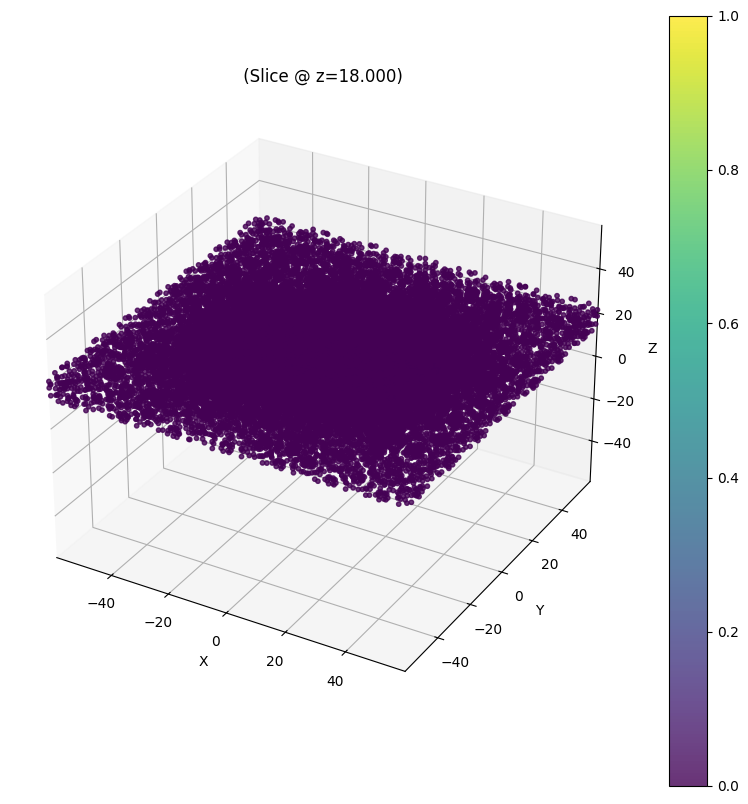

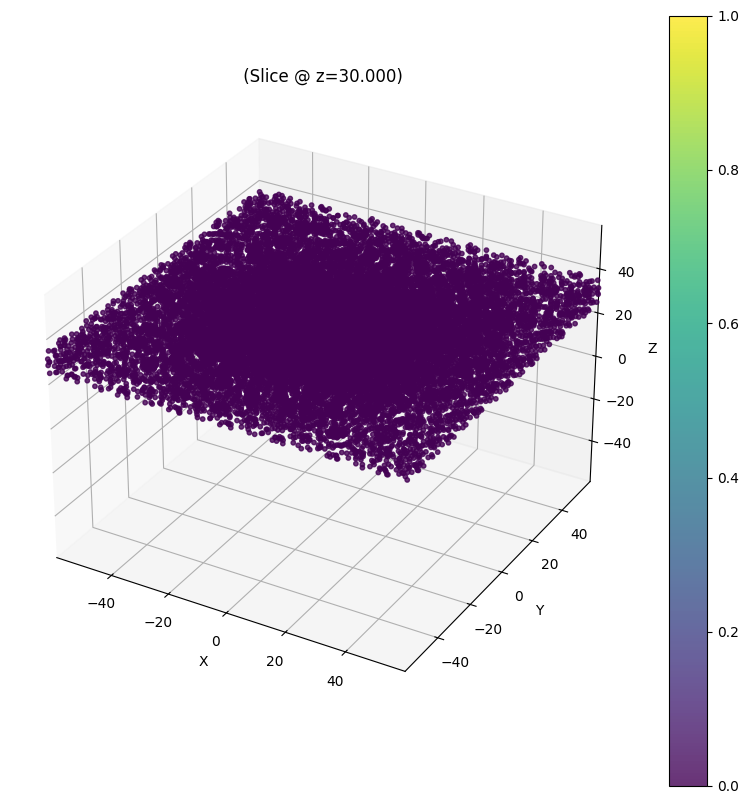

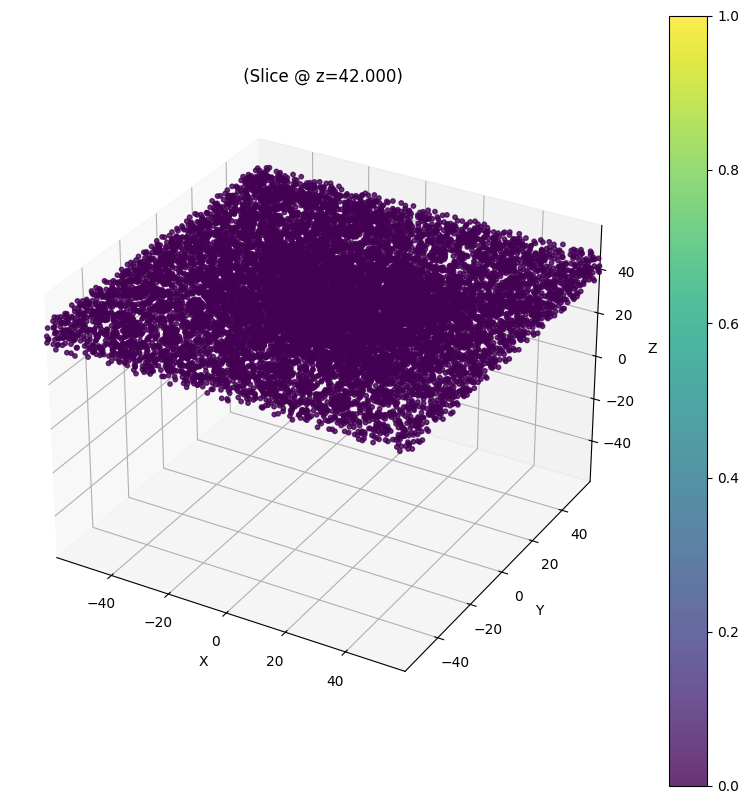

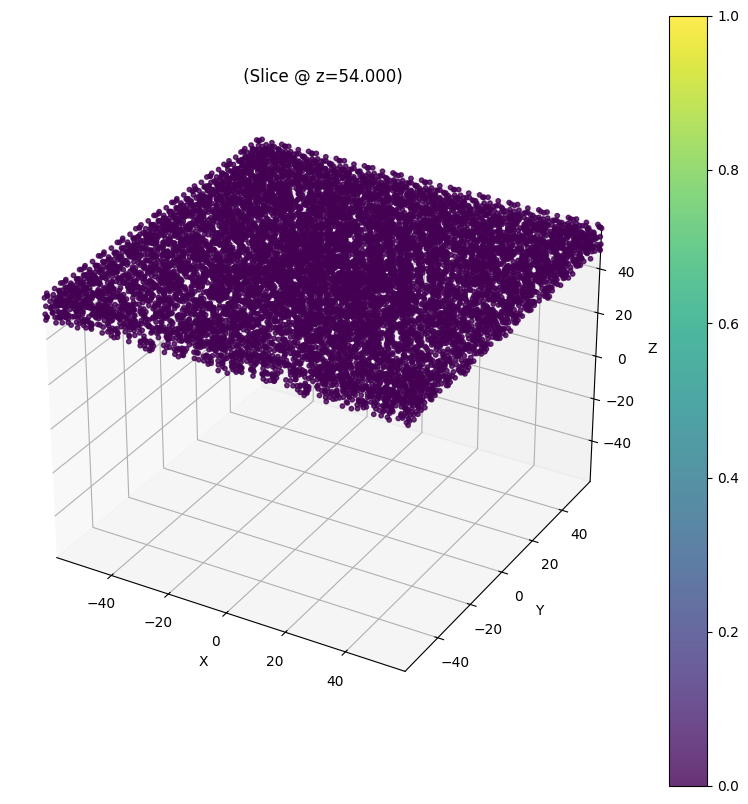

: 

In [ ]:
femsystem.plot_n_slices_interior(theta_at_interior,n_slices=10)